<a href="https://colab.research.google.com/github/NehaJantre/SwingTradingBot/blob/main/QQQ%26SPYForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the required libraries for fbprophet**

In [ ]:
from IPython.display import clear_output
try:
  !pip install pystan
  !pip install fbprophet
except:
  print("Error installing facebook prophet")
finally:
  clear_output()
  print('Dependencies successfully installed')

Dependencies successfully installed


Import the required libraries and dependencies

In [ ]:
import pandas as pd
import datetime as dt
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

Read the SPY and QQQ price closing trends data into a Pandas Dataframe, and then plot the general trends.

In [ ]:
#Upload data to cloud
from google.colab import files
uploaded = files.upload()

Saving SPY Close.csv to SPY Close.csv


In [ ]:
#Upload QQQ data to cloud
from google.colab import files
uploaded = files.upload()

Saving QQQ.csv to QQQ.csv


Read the data from the csv files into a Pandas dataframe

In [ ]:
#Pull in the SPY data into a dataframe
SPY_Close = pd.read_csv('SPY Close.csv')


SPY_Close.head()

,Date,Open,Close
0,1/29/1993,43.96875,43.93750
1,2/1/1993,43.96875,44.25000
2,2/2/1993,44.21875,44.34375
3,2/3/1993,44.40625,44.81250
4,2/4/1993,44.96875,45.00000


In [ ]:
#Create a DF for Spy to include Date and Close price
del SPY_Close['Open']

#Display updated dropped column
SPY_Close.head()

,Date,Close
0,1/29/1993,43.93750
1,2/1/1993,44.25000
2,2/2/1993,44.34375
3,2/3/1993,44.81250
4,2/4/1993,45.00000


In [ ]:
#Rename the columns to the Prophet model syntax
SPY_df = SPY_Close.rename(columns={"Date":"ds", "Close":"y"})

#Review the Spy Dataframe
SPY_df.head()

,ds,y
0,1/29/1993,43.93750
1,2/1/1993,44.25000
2,2/2/1993,44.34375
3,2/3/1993,44.81250
4,2/4/1993,45.00000


In [ ]:
#Create a prophet model for SPY
model_SPY = Prophet()

Fit the Prophet model

In [ ]:
# Fit the SPY Prophet model
model_SPY.fit(SPY_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
Function to forecast one year of trend dates

In [ ]:
# Forecast one year of weekly future trends data for SPY
future_SPY = model_SPY.make_future_dataframe(periods=52, freq="W")

#Display the last five rows of the future_spy Dataframe
future_SPY.tail()

,ds
7254,2022-08-07
7255,2022-08-14
7256,2022-08-21
7257,2022-08-28
7258,2022-09-04


In [ ]:
#Predit future trends data by using the predict method for both the SPY
#Make predictions for SPY using the future_SPY Dataframe
forecast_SPY = model_SPY.predict(future_SPY)

forecast_SPY.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1993-01-29,43.830184,27.447344,59.119861,43.830184,43.830184,0.102909,0.102909,0.102909,-0.023883,-0.023883,-0.023883,0.126793,0.126793,0.126793,0.0,0.0,0.0,43.933094
1,1993-02-01,43.844497,28.824545,58.632032,43.844497,43.844497,0.063382,0.063382,0.063382,-0.091366,-0.091366,-0.091366,0.154748,0.154748,0.154748,0.0,0.0,0.0,43.907879
2,1993-02-02,43.849267,28.539817,58.283579,43.849267,43.849267,0.268809,0.268809,0.268809,0.090638,0.090638,0.090638,0.178171,0.178171,0.178171,0.0,0.0,0.0,44.118077
3,1993-02-03,43.854038,28.255055,59.847459,43.854038,43.854038,0.290178,0.290178,0.290178,0.081740,0.081740,0.081740,0.208439,0.208439,0.208439,0.0,0.0,0.0,44.144217
4,1993-02-04,43.858809,29.595930,60.053358,43.858809,43.858809,0.355523,0.355523,0.355523,0.110397,0.110397,0.110397,0.245126,0.245126,0.245126,0.0,0.0,0.0,44.214332


Plot the Prophet's predictions by using the plot function

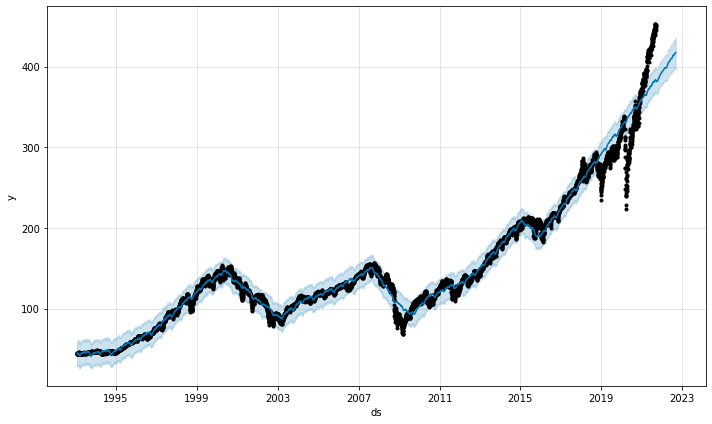

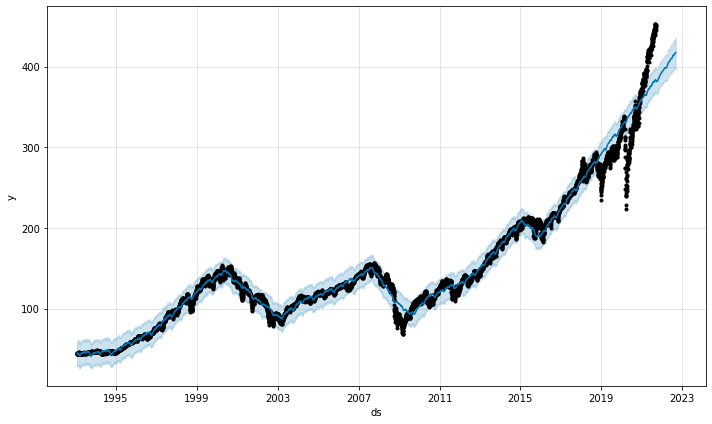

In [ ]:
model_SPY.plot(forecast_SPY)

Plot predictions for our forecast_SPY Dataframe for the 52 week period

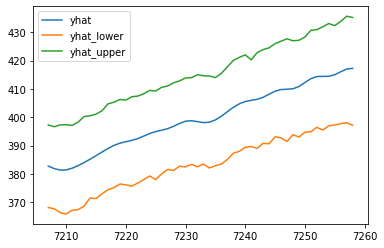

In [ ]:
forecast_SPY[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:].plot()

Use the plot_component function from the Prophet models to analyze the patterns of the SPY time series data.

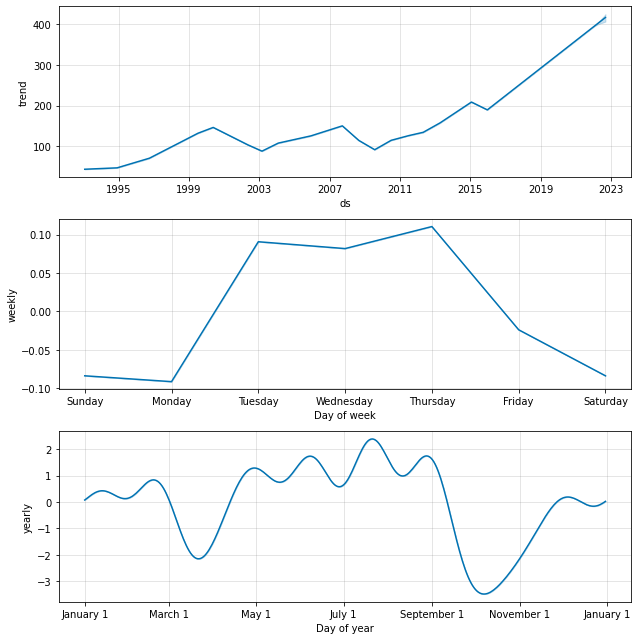

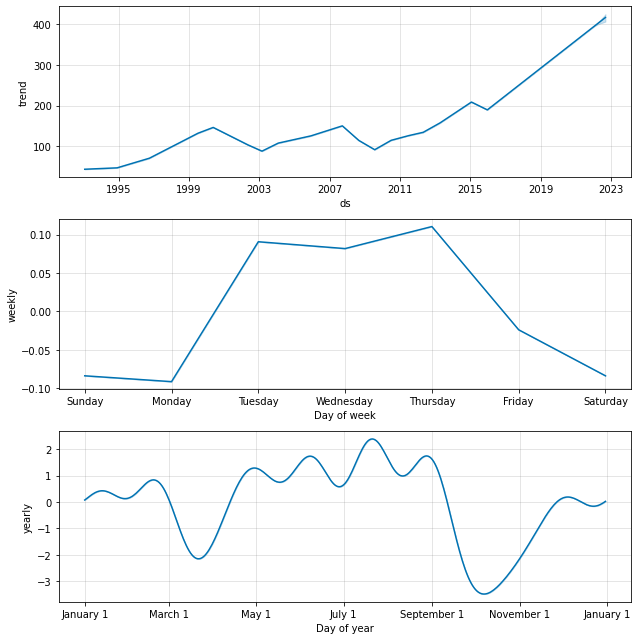

In [ ]:
# Reset the index in the forecast_SPY dataframe
forecast_SPY = forecast_SPY.reset_index()

#Use the plot components function to visualize the forecast results
model_SPY.plot_components(forecast_SPY)

In [ ]:
#Pull in the QQQ data into a dataframe
QQQ_Close = pd.read_csv('QQQ.csv')

QQQ_Close.head()

,Date,Open,Close
0,3/10/1999,51.12500,51.0625
1,3/11/1999,51.43750,51.3125
2,3/12/1999,51.12500,50.0625
3,3/15/1999,50.43750,51.5000
4,3/16/1999,51.71875,51.9375


Prepare the data to fit the Prophet model. Create two new Dataframes one for QQQ and one for SPY.

In [ ]:
#Create a DF for Spy to include Date and Close price
del QQQ_Close['Open']

#Display updated dropped column
QQQ_Close.head()

,Date,Close
0,3/10/1999,51.0625
1,3/11/1999,51.3125
2,3/12/1999,50.0625
3,3/15/1999,51.5000
4,3/16/1999,51.9375


In [ ]:
#Rename the columns to the Prophet model syntax
QQQ_df = SPY_Close.rename(columns={"Date":"ds", "Close":"y"})

#Review the Spy Dataframe
QQQ_df.head()

,ds,y
0,1/29/1993,43.93750
1,2/1/1993,44.25000
2,2/2/1993,44.34375
3,2/3/1993,44.81250
4,2/4/1993,45.00000


In [ ]:
#Create a prophet model for QQQ
model_QQQ = Prophet()

In [ ]:
# Fit the QQQ Prophet model
model_QQQ.fit(QQQ_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
# Forecast one year of weekly future trends data for QQQ
future_QQQ = model_QQQ.make_future_dataframe(periods=52, freq="W")

#Display the last five rows of the future_spy Dataframe
future_QQQ.tail()

,ds
7254,2022-08-07
7255,2022-08-14
7256,2022-08-21
7257,2022-08-28
7258,2022-09-04


In [37]:
#Predit future trends data by using the predict method for both the SPY
#Make predictions for SPY using the future_SPY Dataframe
forecast_QQQ = model_QQQ.predict(future_SPY)

forecast_QQQ.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1993-01-29,43.830184,29.604916,59.294834,43.830184,43.830184,0.102909,0.102909,0.102909,-0.023883,-0.023883,-0.023883,0.126793,0.126793,0.126793,0.0,0.0,0.0,43.933094
1,1993-02-01,43.844497,28.557777,59.355898,43.844497,43.844497,0.063382,0.063382,0.063382,-0.091366,-0.091366,-0.091366,0.154748,0.154748,0.154748,0.0,0.0,0.0,43.907879
2,1993-02-02,43.849267,29.419364,59.161988,43.849267,43.849267,0.268809,0.268809,0.268809,0.090638,0.090638,0.090638,0.178171,0.178171,0.178171,0.0,0.0,0.0,44.118077
3,1993-02-03,43.854038,29.251581,60.479152,43.854038,43.854038,0.290178,0.290178,0.290178,0.081740,0.081740,0.081740,0.208439,0.208439,0.208439,0.0,0.0,0.0,44.144217
4,1993-02-04,43.858809,29.976340,59.848676,43.858809,43.858809,0.355523,0.355523,0.355523,0.110397,0.110397,0.110397,0.245126,0.245126,0.245126,0.0,0.0,0.0,44.214332


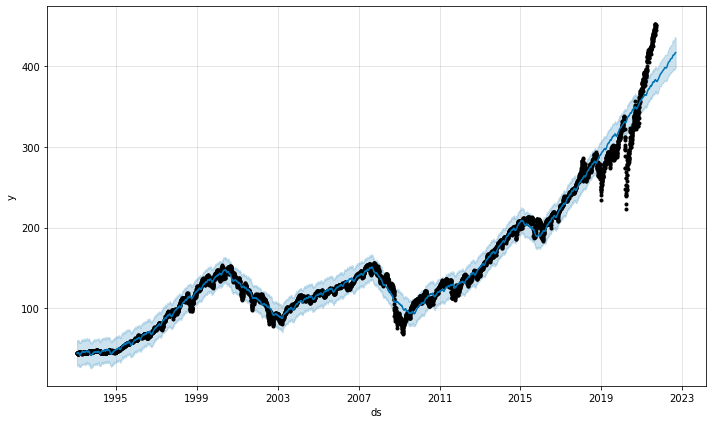

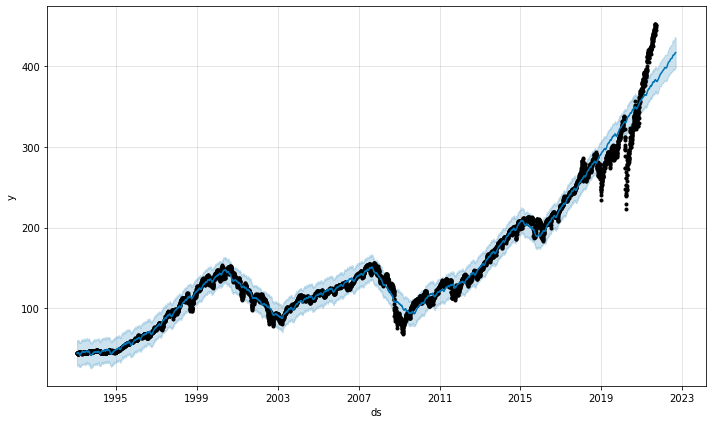

In [38]:
#Plot the prophet's predictions 
model_QQQ.plot(forecast_QQQ)

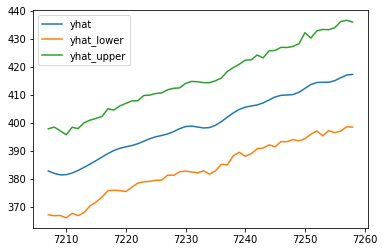

In [39]:
#Plot predictions for our forecast_QQQ Dataframe for the 52 week period
forecast_QQQ[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:].plot()

Use the plot_component function from the Prophet models to analyze the patterns of the QQQ time series data.

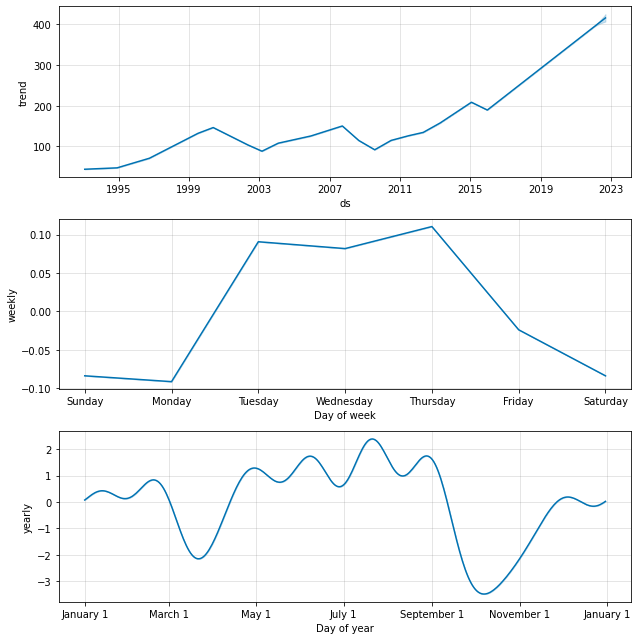

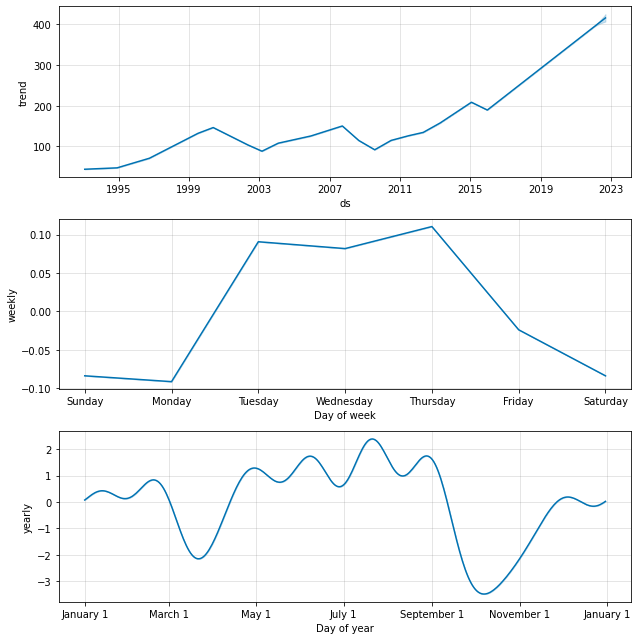

In [40]:
# Reset the index in the forecast_SPY dataframe
forecast_QQQ = forecast_QQQ.reset_index()

#Use the plot components function to visualize the forecast results
model_QQQ.plot_components(forecast_QQQ)